<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>Integration</center></span>
</div>

Now we would like to compute the following integral :
$$\int_{-1}^{1} \frac{x+1}{1+25x^2}dx$$

I will not ask you to compute analytically this integral (but you should be ablo to do it)  
the solution is  
$$\frac{2}{5}\arctan(5)$$

Store this value in a variable `solution`

In [350]:
import numpy as np
solution = 2*np.arctan(5)/5

This variable will be use later to check the precision of th different methods.

Define the function $\text{runge}(x)= \frac{x+1}{1+25x^2}$

In [351]:
def runge(x):
    return  (x+1)/(1+25*x**2)

Plot the function between for $x\in\left[-1,1\right]$

<IPython.core.display.Javascript object>


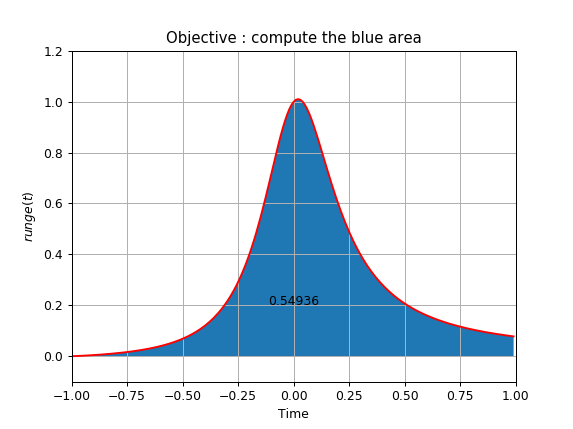

In [352]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

xmin = -1.0
xmax =  1.0

t = np.arange(xmin, xmax, 0.01)

fig, ax = plt.subplots()

plt.fill_between(t, 0, runge(t))
plt.plot(t, runge(t), 'r-')
ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("Time")
plt.ylabel("$runge(t)$")
plt.title('Objective : compute the blue area') 
plt.text(0.,0.2,"{:7.5f}".format(solution),ha="center")
ax.grid()
plt.show()

# The rectangle rule
Integrating is difficult, let's keep thing simple :  

I know how to integrate a constant!  

What if I consider the curve to be some kind of a stair : 
<img src="Integration_rectangle.svg" alt="Flowchart" style="height: 120px"/>

For each step of the stair (let's call $x_\text{min}$ and $x_\text{max}$ the edges of the step),  
we could consider that the function is constant.

$$\begin{align}
\int_{x_\text{min}}^{x_\text{max}} { f(x) dx} &\approx \int_{x_\text{min}}^{x_\text{max}} { C dx}\\
&=C (x_\text{max} - x_\text{min}) \\
\end{align}$$
With $C = f(x_\text{min})$.  
In fact I could have taken $f(x_\text{max})$ it would not be very different,  
But with $f(\frac{x_\text{max} + x_\text{min}}{2})$ it would be much more accurate


We will consider that all steps are equally large  
Write a function `rectangle_integ(N)` that, given a number of points `N`, compute
1. the step width `dx`
2. the positions `rect_x` of left point of the base of each rectangle
3. the heights `rect_y` of each rectangle
4. the value of the integral's approximation `integ`
4. return the values `rect_x`, `rect_y` and `integ`

In [353]:
def rectangle_integ(N):
    dx = (xmax - xmin) / N
    rect_x = np.linspace(xmin,xmax,N)
    rect_y = runge(rect_x)
    integ = 0
    for i in range(N):
        integ += dx * (rect_y[i])
    return rect_x, rect_y, integ

If you correctly wrote your function, the cell bellow should work,  
try it with different number of steps

<IPython.core.display.Javascript object>


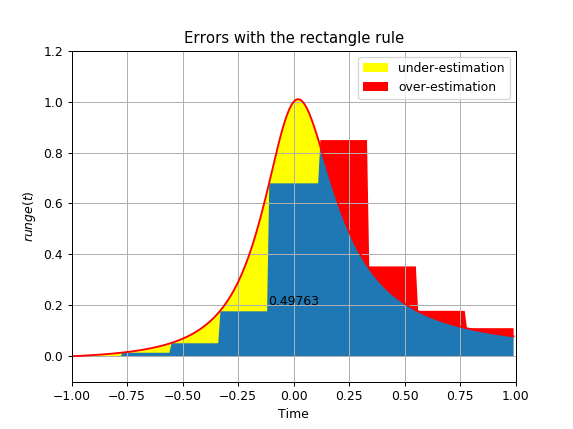

In [354]:
nsteps = 10

rect_x, rect_y, integ = rectangle_integ(nsteps)
dx = rect_x[1] - rect_x[0]

def rectangles(x):
    xx = ((x-xmin) // dx).astype(np.int)
    return np.asarray(rect_y)[xx]

fig, ax = plt.subplots()

ax.plot(t, runge(t),'r-')
plt.fill_between(t, 0, runge(t))
ax.fill_between(t, rectangles(t), runge(t), where=runge(t) >= rectangles(t),
                facecolor='yellow', interpolate=True, label="under-estimation")
ax.fill_between(t, rectangles(t), runge(t), where=runge(t) <= rectangles(t),
                facecolor='red', interpolate=True, label="over-estimation")
ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("Time")
plt.ylabel("$runge(t)$")
plt.title('Errors with the rectangle rule') 
plt.text(0.,0.2,"{:7.5f}".format(integ),ha="center")
ax.grid()
plt.legend()
plt.show()

# Trapezoidal rule
Hey but this correspond to the area of simple geometric shapes  
I also know how to compute area of a trapezoid!
<img src="Integration_trapezoid.svg" alt="Flowchart" style="height: 120px"/>

$$\begin{align}
\int_{x_\text{min}}^{x_\text{max}} { f(x) dx} &= (x_\text{max} - x_\text{min}) \left(\frac{ f(x_\text{max}) + f(x_\text{min})}{2}\right)
\end{align}$$

We will consider that all steps are equally large  
Write a function `trapez_integ(N)` that, given a number of points `N`, compute
1. the step width `dx`
2. the positions `trapz_x` of the edge of each trapezoidal
3. the heights `trapz_y` of each edge of each trapezoidal
4. the value of the integral's approximation `integ`
4. return the values `trapz_x`, `trapz_y` and `integ`

In [355]:
def trapez_integ(N):
    dx = (xmax - xmin) / (N-1)
    trapez_x = np.linspace(xmin,xmax,N-1)
    trapez_y = runge(trapez_x)
    integ = sum(dx * ((trapez_y[1::]+trapez_y[:-1])/2.))
    return trapez_x, trapez_y, integ

If you correctly wrote your function, the cell bellow should work,  
try it with different number of steps

<IPython.core.display.Javascript object>


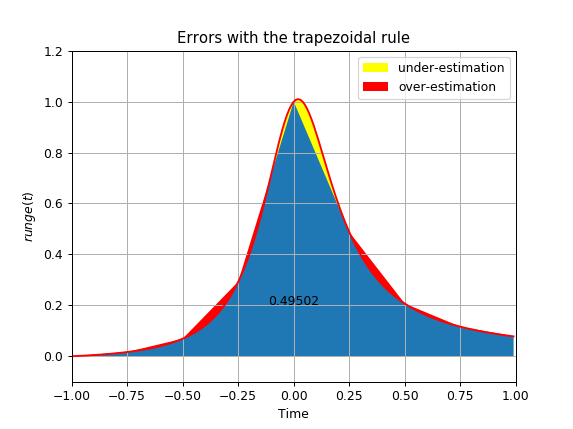

In [356]:
nsteps = 10

trapz_x, trapz_y, integ = trapez_integ(nsteps)
dx = trapz_x[1] - trapz_x[0]

def trapezoids(x):
    i1 = ((x-xmin) // dx).astype(np.int)
    i2 = i1 + 1 
    x1 = np.asarray(trapz_x)[i1]
    x2 = np.asarray(trapz_x)[i2]
    
    y1 = np.asarray(trapz_y)[i1]
    y2 = np.asarray(trapz_y)[i2]
    
    a = (y2-y1) / (x2-x1)
    b = y1 - a * x1
    
    return a * x + b 

fig, ax = plt.subplots()

ax.plot(t, runge(t),'r-')
plt.fill_between(t, 0, runge(t))
ax.fill_between(t, trapezoids(t), runge(t), where=runge(t) >= trapezoids(t),
                facecolor='yellow', interpolate=True, label="under-estimation")
ax.fill_between(t, trapezoids(t), runge(t), where=runge(t) <= trapezoids(t),
                facecolor='red', interpolate=True, label="over-estimation")
ax.set_xlim(xmin,xmax)
ax.set_ylim(-0.1,1.2)
plt.xlabel("Time")
plt.ylabel("$runge(t)$")
plt.title('Errors with the trapezoidal rule') 
plt.text(0.,0.2,"{:7.5f}".format(integ),ha="center")
ax.grid()
plt.legend()
plt.show()

# Polynoms

In fact, it looks like I'm integrating an easier version of the function.  
Last week we learn a way to approximate a function with a polynom.  

What happen if
1. we take a number of evenly spaced of points,
2. use them to approximate the function `runge`
3. compute the integral of this polynom

First let's write a function `approx_poly(x,y)` that compute the coefficients of the poynom that best approximate this function (remember what we've done last week)

In [357]:
import numpy as np

In [358]:
def approx_poly(x,y):
    coeffs=[]
    M=np.ones((len(x),len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
                M[i,j]=np.power(x[i],len(x)-j-1)
    coeffs=np.linalg.solve(M, y)
    return coeffs

Write a function `poly(t, coefs)` that evaluate a polynom on t

In [359]:
def poly(x, coefs):
    y = 0
    for j in range(len(coefs)):
        y += coefs[j]*np.power(x,len(coefs)-j-1)
    return y

Now we need the integrate this polynom.
using this formula, this is easily done :
$$ \int_a^b cx^idx = \left[\frac{c}{i+1}x^{i+1} \right]_a^b = \frac{c}{i+1}b^{i+1} - \frac{c}{i+1}a^{i+1}$$

Write a function `integ_poly(coefs)` that compute the integral bellow a polynom

In [360]:
#import scipy.integrate as integrate
def integ_poly(coefs):
    #result = integrate.quad(runge, -1., 1.)
    integ = 0.
    for i in range(len(coefs)):
            integ += ((xmax ** ( i + 1)) - (xmin ** ( i + 1))) * ( coefs[len(coefs)-i-1] / ( i + 1) )  
            #print("i, integ:", i, integ, "coefs[i]",coefs[i])
    return integ

Here is a function that plot graph of the error (similar to what I made before)

In [361]:
def graph_poly(x, coefs):
    fig, ax = plt.subplots()

    t = np.arange(xmin, xmax+0.01, 0.01)

    ax.plot(t, runge(t),'r-')

    ax.plot(t, poly(t, coefs),'k-')
    ax.plot(x, poly(x, coefs),'ko')

    ax.fill_between(t, poly(t, coefs), runge(t), where=runge(t) >= poly(t, coefs),
                    facecolor='yellow', interpolate=True, label="under-estimation")
    ax.fill_between(t, poly(t, coefs), runge(t), where=runge(t) <= poly(t, coefs),
                    facecolor='red', interpolate=True, label="over-estimation")
    
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(-0.1,1.2)
    plt.xlabel("Time")
    plt.ylabel("$runge(t)$")
    plt.title('Errors with polynoms') 
    plt.text(0.,0.2,"{:7.5f}".format(integ_poly(coefs)),ha="center")
    ax.grid()
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


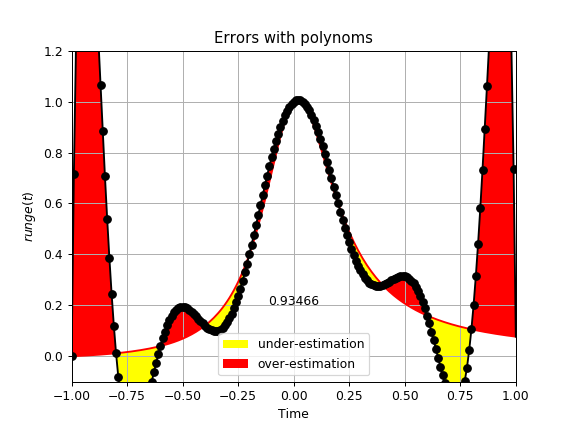

In [362]:
npoints = 11
x_raw = np.linspace(xmin,xmax,npoints)
y_raw = runge(x_raw)
coef_poly = approx_poly(x_raw,y_raw)
#print(coef_poly)
y_poly = poly(t,coef_poly)
integ = integ_poly(coef_poly)
#print(integ)
graph_poly(t, coef_poly)

Try (plot) your function for differents number of points.

<IPython.core.display.Javascript object>


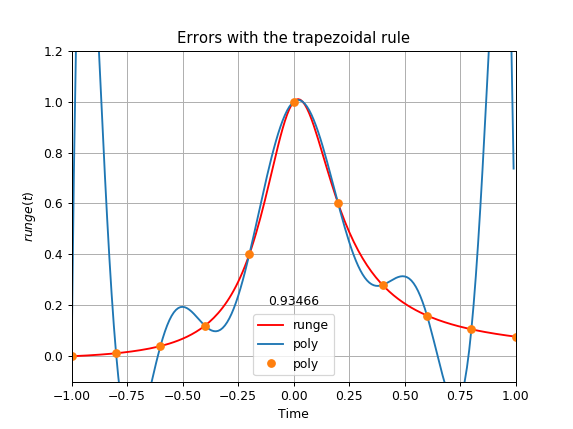

In [363]:
fig, dx = plt.subplots()
dx.plot(t, runge(t),'r-',label='runge')
dx.plot(t,y_poly,label='poly')
dx.plot(x_raw,y_raw,'o',label='poly')
dx.set_xlim(xmin,xmax)
dx.set_ylim(-0.1,1.2)
plt.xlabel("Time")
plt.ylabel("$runge(t)$")
plt.title('Errors with the trapezoidal rule') 
plt.text(0.,0.2,"{:7.5f}".format(integ),ha="center")
dx.grid()
plt.legend()
plt.show()

Arg! We still have the instabilities we saw last week.  
Maybe redistributing the points will give better results

Try (plot) your function for differents number of points with a different points distribution `new_x` obtained with the $\arctan$ function.

<IPython.core.display.Javascript object>


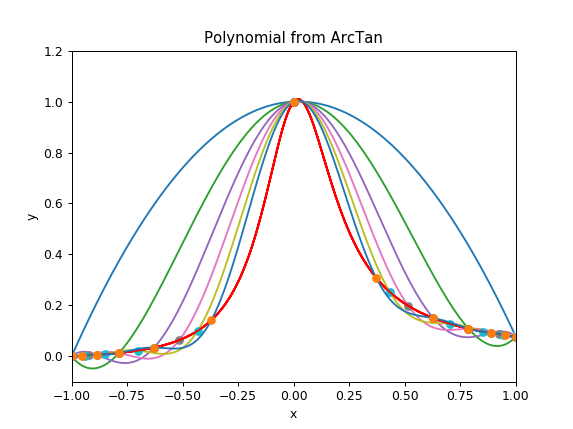

n 3 inte: 1.358974358974359
n 5 inte: 0.9699495628245479
n 7 inte: 0.7937184385886159
n 9 inte: 0.6939157434218206
n 11 inte: 0.6367394570599778
n 13 inte: 0.6021859599001056


In [366]:
npoints=15
ListInteg = []
fig, cx = plt.subplots()
for n in range(3,npoints,2):
    arctan_factor = 3
    old_x = np.linspace(xmin,xmax,n)
    new_x = np.arctan(arctan_factor*old_x)
    new_x /= np.max(new_x)
    y_atan = runge(new_x)
    coef_atan = approx_poly(new_x,y_atan)
    #for i in range(len(coef_atan)):
    #    y_coef_atan += coefs[i]*np.power(x,len(coefs)-i-1)
    integ = integ_poly(coef_atan)
    ListInteg.append(integ)
    print('n',n,'inte:',integ,)
    #plot
    
    
    cx.plot(t, runge(t),'r-', label="Runge")
    cx.plot(t, poly(t, coef_atan),'-',label="High order polynomial approximation")
    cx.plot(new_x, y_atan,'o',label="Init Data" )
    cx.set_xlim(xmin,xmax)
    cx.set_ylim(-0.1,1.2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Polynomial from ArcTan')
    plt.grid()
    #plt.legend(loc="upper left")
plt.show()

Arg this converge sooooo slowly !  
This is the main reason why we prefer spline over high order polynomials

# Scipy

Usually you don't need to write yourself all the algorithms, the python community did that for you !

For exemple you might have used scipy.

Plot the evolution of the error as a function of the number of iteration for your three methods and romb from scipy.


<IPython.core.display.Javascript object>


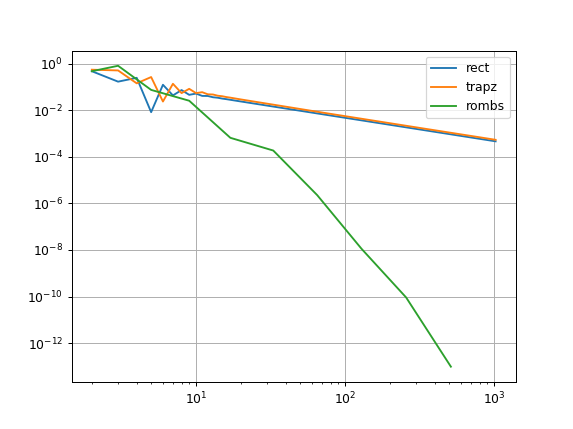

In [367]:
from scipy.integrate import romb

rect = []
trapz = []
rombs = []

x1 = []
x2 = []

for N in range (2,1025):
    
    *_, integ_rect = rectangle_integ(N)
    *_, integ_trapz = trapez_integ(N)
    
    x1.append(N)
    rect.append(abs(integ_rect-solution))
    trapz.append(abs(integ_trapz-solution))

    if 2 ** int(round(np.log2(N - 1))) +1 == N:
        x = np.linspace(-1,1,N)
        y = runge(x)
        dx = x[1] - x[0]
        integ_romb = romb(y, dx)

        x2.append(N)
        rombs.append(abs(integ_romb-solution))
        
        

plt.figure()
plt.loglog(x1,rect,label="rect")
plt.loglog(x1,trapz,label="trapz")
plt.loglog(x2,rombs,label="rombs")
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send **the pdf AND the notebook** to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>